In [ ]:

import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/demo_dataset.csv'
#Use to import pandas
import pandas as pd
data = pd.read_csv(path)
data

,id,Refund,gender,marital,income,cheat
0,1,No,F,Married,1100,Yes
1,2,Yes,M,Married,1000,No
2,3,Yes,F,Single,700,No
3,4,Yes,M,Single,300,Yes
4,5,No,M,Married,400,Yes
5,6,No,F,Divorced,1400,No
6,7,Yes,F,Single,1200,Yes
7,8,No,F,Divorced,1000,No
8,9,No,F,Married,900,Yes
9,10,Yes,M,Divorced,800,Yes


In [ ]:
data['gender'] = data['gender'].map({'M': 1, 'F': 0})
data

,id,Refund,gender,marital,income,cheat
0,1,No,0,Married,1100,Yes
1,2,Yes,1,Married,1000,No
2,3,Yes,0,Single,700,No
3,4,Yes,1,Single,300,Yes
4,5,No,1,Married,400,Yes
5,6,No,0,Divorced,1400,No
6,7,Yes,0,Single,1200,Yes
7,8,No,0,Divorced,1000,No
8,9,No,0,Married,900,Yes
9,10,Yes,1,Divorced,800,Yes


In [ ]:
# Let convert "refund" feature also.
data['Refund'] = data['Refund'].map({'Yes': 1, 'No': 0})
data

,id,Refund,gender,marital,income,cheat
0,1,0,0,Married,1100,Yes
1,2,1,1,Married,1000,No
2,3,1,0,Single,700,No
3,4,1,1,Single,300,Yes
4,5,0,1,Married,400,Yes
5,6,0,0,Divorced,1400,No
6,7,1,0,Single,1200,Yes
7,8,0,0,Divorced,1000,No
8,9,0,0,Married,900,Yes
9,10,1,1,Divorced,800,Yes


In [ ]:
# Now us convert each of the category of the feature "Marital Status" as binary
# duplicate "Marital" column into 'mar'.
data['mar'] = data.loc[:, 'marital']
data = pd.get_dummies(data, columns=['mar'])
data
# data = data.drop(['mar_Divorced', 'mar_Married','mar_Single'], axis=1)
# data = pd.get_dummies(data, columns=['mar'],drop_first=True)

,id,Refund,gender,marital,income,cheat,mar_Divorced,mar_Married,mar_Single
0,1,0,0,Married,1100,Yes,False,True,False
1,2,1,1,Married,1000,No,False,True,False
2,3,1,0,Single,700,No,False,False,True
3,4,1,1,Single,300,Yes,False,False,True
4,5,0,1,Married,400,Yes,False,True,False
5,6,0,0,Divorced,1400,No,True,False,False
6,7,1,0,Single,1200,Yes,False,False,True
7,8,0,0,Divorced,1000,No,True,False,False
8,9,0,0,Married,900,Yes,False,True,False
9,10,1,1,Divorced,800,Yes,True,False,False


In [ ]:
X=data[['Refund','gender','income','mar_Married',	'mar_Single',	'mar_Divorced']]
Y=data['cheat']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=123)

In [ ]:
from sklearn import tree
dtree= tree.DecisionTreeClassifier(criterion='entropy')

dtree = dtree.fit(x_train, y_train)

# from sklearn.tree import DecisionTreeClassifier
# dtree= DecisionTreeClassifier()

In [ ]:
# let's copy first row from the original data set for which class is 'No'. The code is:
tr=X.iloc[:1]
tr

,Refund,gender,income,mar_Married,mar_Single,mar_Divorced
0,0,0,1100,True,False,False


In [ ]:
# We can test this data row to test our model, results shoul be 'No'
dtree.predict(tr)

array(['Yes'], dtype=object)

In [ ]:
# If you want to predict a person's class who is not in the data set, you have to convert it to DataFrame.
input_data = pd.DataFrame([[1, 1, 1100, True, False, False]], columns=['Refund', 'gender', 'income', 'mar_Married', 'mar_Single', 'mar_Divorced'])
prediction = dtree.predict(input_data)
prediction

array(['No'], dtype=object)

In [ ]:
x_test, y_test

(    Refund  gender  income  mar_Married  mar_Single  mar_Divorced
 7        0       0    1000        False       False          True
 10       1       0     500        False        True         False
 4        0       1     400         True       False         False,
 7      No
 10    Yes
 4     Yes
 Name: cheat, dtype: object)

In [ ]:
# Now we will predict the class of our test data:
y_pred=dtree.predict(x_test)
y_pred

array(['Yes', 'No', 'Yes'], dtype=object)

Text(50.722222222222214, 0.5, 'Predicted')

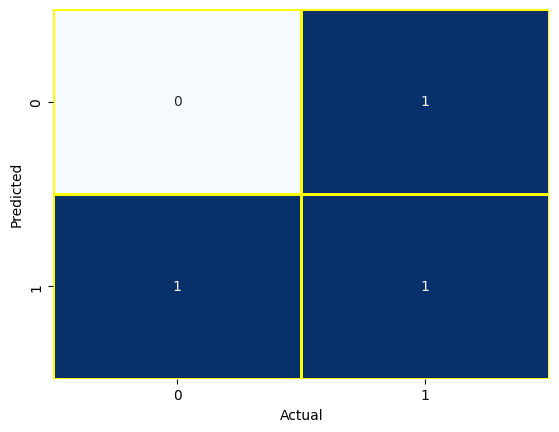

In [ ]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

s=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,linewidths=2, linecolor='yellow')
s.set_xlabel('Actual', fontsize=10)
s.set_ylabel('Predicted', fontsize=10)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import precision_score
accuracy_sc=metrics.accuracy_score(y_test, y_pred)

preci=metrics.precision_score(y_test, y_pred,average=None)
f1_score=metrics.f1_score(y_test, y_pred,average=None)

print(f"Precision of test data is {preci[0]:.2f}")
print(f"Recall of test data is {preci[1]:.2f}")
print(f"F-score of test data is {f1_score[0]:.2f}")
# To creating the Confusion Matrix
con_mat=metrics.confusion_matrix(y_test, y_pred)


Precision of test data is 0.00
Recall of test data is 0.50
F-score of test data is 0.00


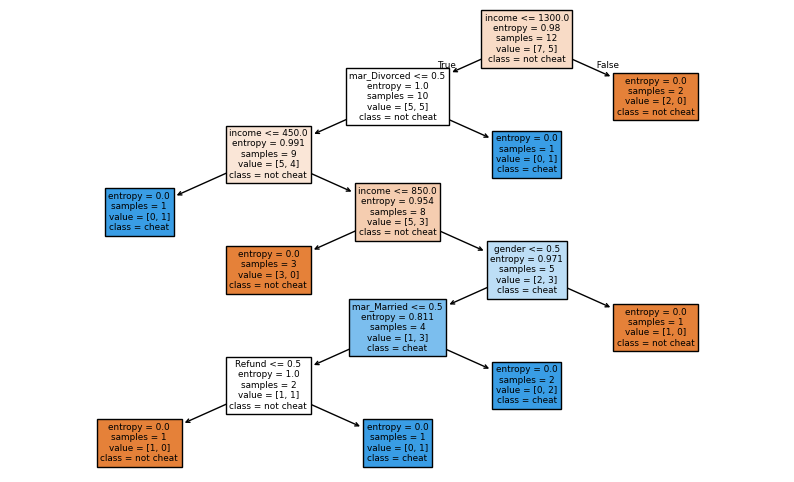

In [ ]:
from matplotlib import pyplot as plt
feature_names_list=['Refund','gender','income','mar_Married',	'mar_Single',	'mar_Divorced']
#class_names_list=['cheat']
class_names_list = ['not cheat', 'cheat']
fig = plt.figure(figsize=(10,6))
_ = tree.plot_tree(dtree,
                   feature_names=feature_names_list,
                   class_names=class_names_list,
                   filled=True)

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np
train_size, train_score, test_score = learning_curve(
    dtree, X, Y, train_sizes=np.linspace(.1,1,10)
)
test_score

array([[0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.        ],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.66666667, 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 1.        ],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.66666667, 0.        , 0.66666667, 0.33333333],
       [0.66666667, 0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.33333333]])

In [23]:
test_score

array([[0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.        ],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.66666667, 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 1.        ],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.66666667, 0.        , 0.66666667, 0.33333333],
       [0.66666667, 0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.        , 0.33333333, 0.33333333]])

In [24]:
test_score_mean=np.mean(test_score,axis=1)
test_score_mean

array([0.4       , 0.4       , 0.4       , 0.46666667, 0.53333333,
       0.4       , 0.4       , 0.46666667, 0.33333333, 0.33333333])

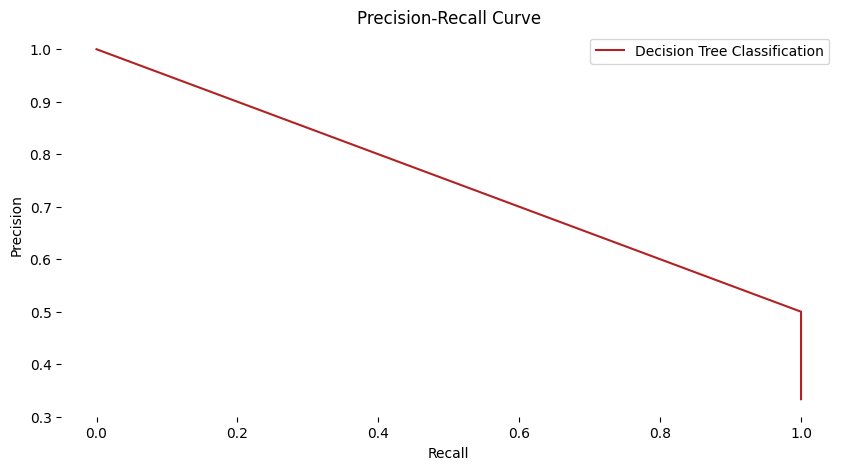

In [25]:
# Precision Curve
y_test_recode = y_test.map({'Yes': 0, 'No': 1})
y_pred_prob=dtree.predict_proba(x_test)[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test_recode,y_pred_prob)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(recall, precision, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

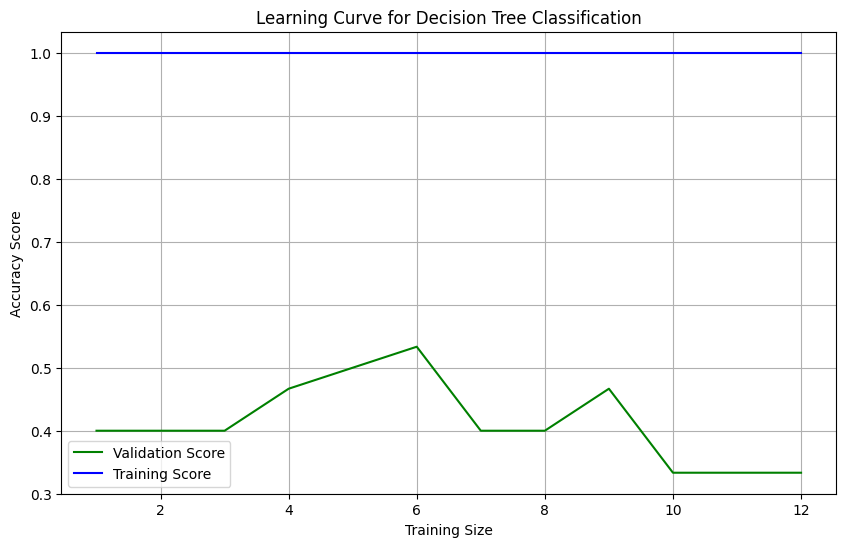

In [26]:
# Learning Curve
test_score_mean=np.mean(test_score,axis=1)
train_score_mean=np.mean(train_score,axis=1)
plt.figure(figsize=(10,6))
plt.plot(train_size,test_score_mean, label='Validation Score',color='green')
plt.plot(train_size,train_score_mean, label='Training Score',color='blue')
plt.title('Learning Curve for Decision Tree Classification')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Size')
plt.legend(loc='best')
plt.grid(True)
plt.show()



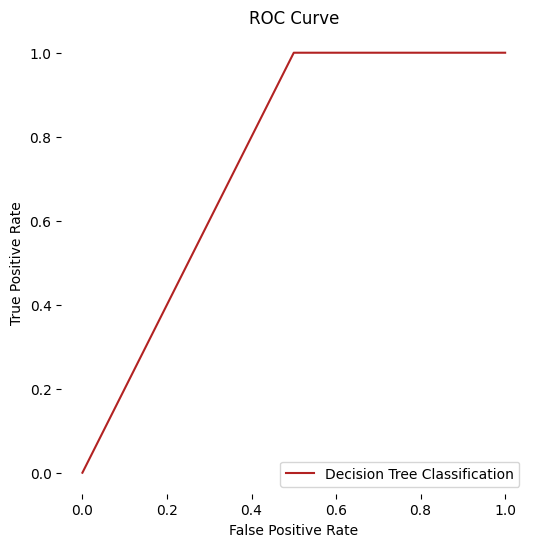

In [27]:
# ROC Curve
y_test_recode = y_test.map({'Yes': 0, 'No': 1})
y_pred_prob=dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_recode,  y_pred_prob)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();